In [1]:
import pandas as pd
import numpy as np

In [2]:
# train 데이터 불러오기
train = pd.read_csv('data/train.csv')

# test 데이터 불러오기
test = pd.read_csv('data/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('data/sample_submission.csv')

In [91]:
sample_submission

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [3]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [78]:
train['ProdTaken'].value_counts()

0    1572
1     383
Name: ProdTaken, dtype: int64

In [4]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [5]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [49]:
# 피처 엔지니어링
# 결측치 제거 및 대체

In [19]:
dropTrain = train.dropna(subset = ['Age','MonthlyIncome']) 
# 나이와 월수입은 여행상품신청에 중요한 요소일 것으로 판단하여 결측치 포함한 행 제거

In [20]:
dropTrain

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
5,6,32.0,Self Enquiry,1,29.0,Small Business,Male,4,4.0,Deluxe,3.0,Divorced,3.0,1,5,1,1.0,Manager,24857.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [22]:
dropTrain.isnull().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch             61
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [21]:
# 1955-(1955*0.1) 전체 데이터의 10% 이하로 제거할 것

1759.5

In [23]:
dropTrain.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1817.000000,1817.000000,1817.000000,1756.000000,1817.000000,1804.000000,1807.000000,1760.000000,1817.000000,1817.000000,1817.000000,1790.000000,1817.000000,1817.000000
mean,982.399009,37.526692,1.651624,15.587699,2.965327,3.754989,3.563365,3.311932,0.291690,3.067144,0.619152,1.258659,23730.485966,0.198679
std,562.933765,9.197926,0.912613,8.153984,0.705866,1.007379,0.789078,1.816441,0.454665,1.371879,0.485729,0.853507,5650.473564,0.399116
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,491.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20629.000000,0.000000
50%,988.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22439.000000,0.000000
75%,1470.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25683.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [42]:
# 선호 호텔 숙박업소 등급은 중앙값으로 대체
dropTrain['PreferredPropertyStar'] = dropTrain['PreferredPropertyStar'].fillna(dropTrain['PreferredPropertyStar'].median())

<ipython-input-42-f3be66f992fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropTrain['PreferredPropertyStar'] = dropTrain['PreferredPropertyStar'].fillna(dropTrain['PreferredPropertyStar'].median())


In [43]:
dropTrain.isnull().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch             61
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [44]:
# 나머지 결측치들은 모두 0으로 대체
# 영업 사원이 고객에게 제공하는 프레젠테이션 기간, 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수, 평균 연간 여행 횟수는 
# 0이 없으므로 결측치가 0이라고 판단
# 함께 여행을 계획 중인 5세 미만의 어린이 수 또한 결측값은 어린이 수가 없다고(0) 판단
dropTrain = dropTrain.fillna(0)

In [45]:
dropTrain.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [46]:
# 결측치 처리 완.

In [92]:
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0


In [93]:
test.isnull().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [52]:
# test데이터도 결측치 처리
dropTest = test.dropna(subset = ['Age','MonthlyIncome']) 
dropTest['PreferredPropertyStar'] = dropTest['PreferredPropertyStar'].fillna(dropTest['PreferredPropertyStar'].median())

dropTest = dropTest.fillna(0)

In [58]:
dropTest.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
# test 데이터 결측치 처리 완.

{'whiskers': [<matplotlib.lines.Line2D at 0x242e40813d0>,
 'caps': [<matplotlib.lines.Line2D at 0x242e4081a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e4081070>],
 'medians': [<matplotlib.lines.Line2D at 0x242e408f190>],
 'fliers': [<matplotlib.lines.Line2D at 0x242e408f4f0>],
 'means': []}

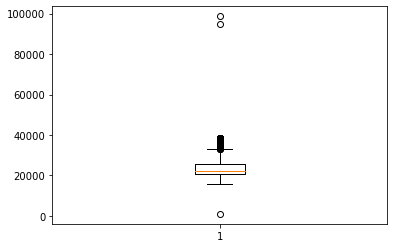

In [48]:
import matplotlib.pyplot as plt
plt.boxplot(dropTrain["MonthlyIncome"])
# 월수입은 이상치 존재하고 표준편차가 매우 크다는 것을 알아두기

In [50]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

objcolumns = dropTrain.columns[dropTrain.dtypes == 'object']
dropTrain[objcolumns]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
5,Self Enquiry,Small Business,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [59]:
for col in objcolumns:
    le = LabelEncoder()
    dropTrain[col] = le.fit_transform(dropTrain[col])
    dropTest[col] = le.transform(dropTest[col])

In [60]:
dropTrain

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
5,6,32.0,1,1,29.0,3,2,4,4.0,1,3.0,0,3.0,1,5,1,1.0,2,24857.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [61]:
dropTest

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [62]:
# 분석할 의미가 없는 칼럼을 제거
dropTrain = dropTrain.drop(columns=['id'])
dropTest = dropTest.drop(columns=['id'])

In [63]:
target = dropTrain['ProdTaken']

In [64]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(dropTrain, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1453, 19), (364, 19), (1453,), (364,))

In [65]:
X_train = X_train.drop(columns=['ProdTaken'])
X_val = X_val.drop(columns=['ProdTaken'])
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1453, 18), (364, 18), (1453,), (364,))

In [73]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred[:,1])

0.8510416666666668

In [76]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.7691666666666667

In [87]:
# xgboost
import xgboost as xgb
model = xgb.XGBRFClassifier(random_state=2022,eval_metric='mlogloss', use_label_encoder =False)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

# https://webnautes.tistory.com/1672

0.86828125

In [88]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])
# https://nsbg.tistory.com/entry/Sklearn-ConvergenceWarning-lbfgs-failed-to-converge-status1

0.77078125

In [80]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.5888020833333334

In [81]:
# 서포트벡터머신
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

# https://beausty23.tistory.com/146

AttributeError: predict_proba is not available when  probability=False

In [86]:
# 서포트벡터머신
from sklearn.svm import SVC
model = SVC(random_state=2022, probability=True)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.4613020833333333

In [90]:
# xgboost로 모델 결정
model = xgb.XGBRFClassifier(random_state=2022,eval_metric='mlogloss', use_label_encoder =False)
model.fit(X_train, y_train)

prediction = model.predict(dropTest)
sample_submission['ProdTaken'] = prediction

ValueError: Length of values (2742) does not match length of index (2933)